In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
import matplotlib.pyplot as plt

**Helper function**

Below we are writing a custom user-defined function to plot two side by side images to compare the effect of the methods.   

In [3]:
# Helper function to compare result
def compare_image(image1, image2):
  plt.figure(figsize=(9,9))
  plt.subplot(1,2,1)
  plt.imshow(image1)
  plt.title('Orignal')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(image2)
  plt.title('Modified')
  plt.axis('off')
  plt.tight_layout()

**Implementing various noise filtering techniques**

Now let’s start with the first filter which is the median filter. 

**Gaussian filter**

Using the below lines of code, we can apply the Gaussian filter or Gaussian blur to a noisy image.

In [4]:
import cv2
import urllib.request as url
import numpy as np
import requests
#from google.colab.patches import cv2_imshow

req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/taj-1.jpeg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

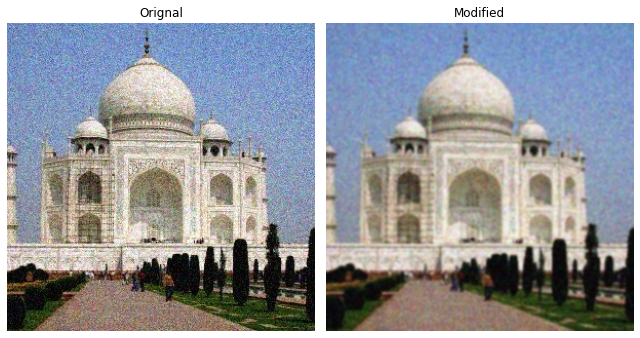

In [5]:
# Reading image
#img = cv2.imread(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Gaussian filter
gs_img = cv2.GaussianBlur(img,(5,5),0)
compare_image(img, gs_img)

**Mean Filter or Averaging**

Now we will apply the mean filter to the noisy image which is also called averaging.

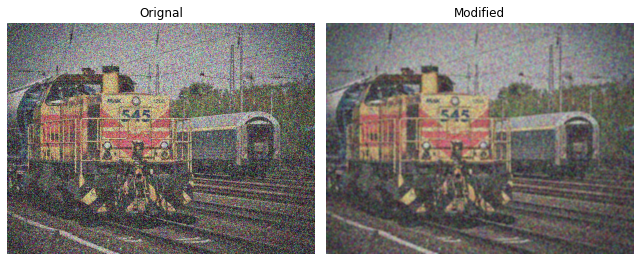

In [6]:
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/engine.jpeg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Mean filter / averaging
gs_img = cv2.blur(img,(7,7))
compare_image(img, gs_img)

**Median filter**

Here, we will do it a little differently. First, we will add noise to an image and then denoise that image using the median filter. So let's read an image and add some noise to that.

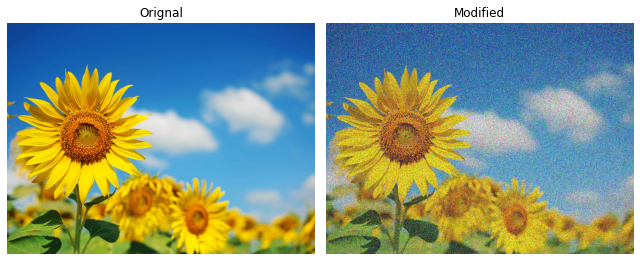

In [7]:
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/sunflowers.jpeg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Adding S&P noise
from skimage.util import random_noise  
noise_img = random_noise(img, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Comparing
compare_image(img, noise_img)

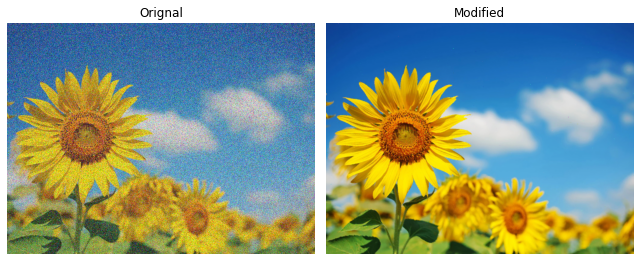

In [8]:
# Median filter
median = cv2.medianBlur(noise_img,5)
compare_image(noise_img, median)

**Bilateral Filter**

Here we will apply the bilateral filter to denoise a noisy image.

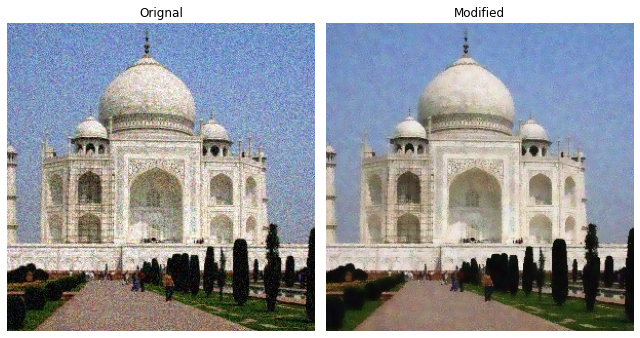

In [9]:
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/taj-1.jpeg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Bilateral filter
bilat_img = cv2.bilateralFilter(img,9,75,75)
compare_image(img, bilat_img)

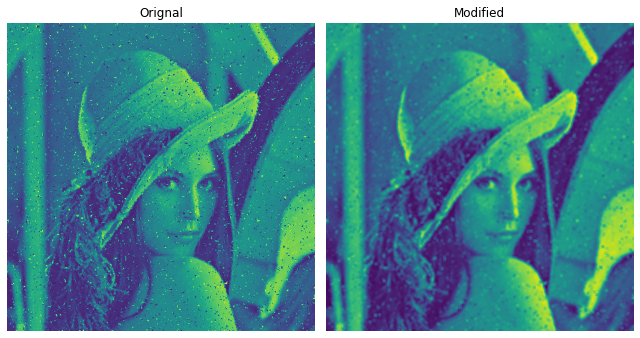

In [10]:
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/noise2.jpg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr,-1) # 'Load it as it is'
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 2-D convolution
import numpy as np
kernel = np.ones((5,5),np.float32)/25
conv_img = cv2.filter2D(img,-1,kernel)
compare_image(img, conv_img)